In [62]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [63]:
data = pd.read_excel(r"C:\Users\minhp\Heetch\mobile_event.xlsx")

In [64]:
data

,device_id,event_name,timestamp
0,1,pickup_shown,2020-10-02 15:36:02
1,1,dropoff_shown,2020-10-02 15:36:05
2,1,pickup_confirmed,2020-10-02 15:36:05
3,1,dropoff_address_typed,2020-10-02 15:36:06
4,1,dropoff_shown,2020-10-02 15:36:10
...,...,...,...
236,7,dropoff_shown,2020-10-07 14:30:11
237,7,pickup_shown,2020-10-07 14:30:33
238,7,pickup_address_typed,2020-10-07 14:30:38
239,7,pickup_shown,2020-10-07 14:30:41


<BarContainer object of 9 artists>

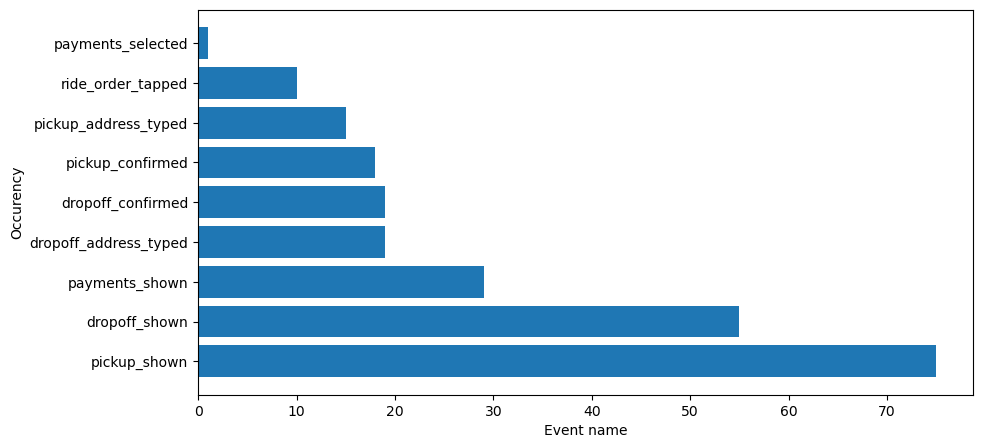

In [65]:
#visualize data
# function to add value labels
# function to add value labels
def addlabels(x,y):
    for i in range(len(y)):
        plt.text(i, x[i], x[i], ha = 'center')
event_name = data.event_name.value_counts().to_dict()
group_data = list(event_name.values())
group_names = list(event_name.keys())
fig, ax = plt.subplots(figsize=(10, 5))
ax.set(xlabel='Event name', ylabel='Occurency')
ax.barh(group_names, group_data)


# the number of ride_order_tapped events should be equal to the number of checkout_selected events, however, the chart above shows the numerical unequalities of these two events

In [66]:
# number of rides
rides = data[data["event_name"]=="ride_order_tapped"]
print(rides)
n_rides = len(rides)

     device_id         event_name           timestamp
17           2  ride_order_tapped 2020-10-06 17:07:57
29           2  ride_order_tapped 2020-10-06 18:29:31
41           2  ride_order_tapped 2020-10-06 19:59:27
68           2  ride_order_tapped 2020-10-06 20:25:19
82           2  ride_order_tapped 2020-10-06 20:41:28
95           2  ride_order_tapped 2020-10-07 07:28:21
100          2  ride_order_tapped 2020-10-07 07:40:09
117          2  ride_order_tapped 2020-10-07 10:39:16
175          4  ride_order_tapped 2020-10-03 16:11:34
232          7  ride_order_tapped 2020-10-07 13:17:05


In [67]:
order_ride_failed = 0
payment_failed = 0
for index_row in range(len(data)):
    if data.iloc[index_row,1] == "ride_order_tapped" and data.iloc[index_row+1,1] == "drop_off_shown":
        order_ride_failed +=1
    if data.iloc[index_row,1] == "ride_order_tapped" and data.iloc[index_row+1,1] == "payments_shown":
        payment_failed +=1      
print("number of sessions failed at payment is: ",payment_failed )
print("\nnumber of sessions failed at booking is: ",order_ride_failed )
print("\ntotal number of rides is:", n_rides)

number of sessions failed at payment is:  1

number of sessions failed at booking is:  0

total number of rides is: 10


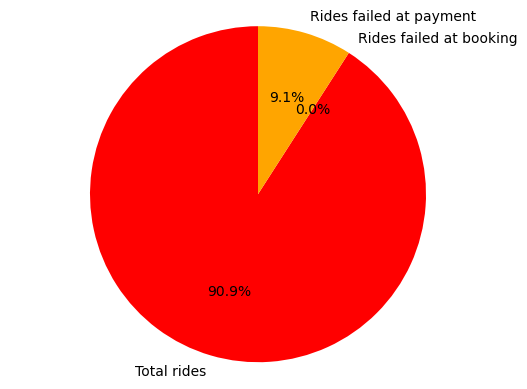

In [69]:

labels= ['Total rides','Rides failed at booking', 'Rides failed at payment',]

colors=['red', 'yellow', 'orange']

sizes= np.array([n_rides, order_ride_failed, payment_failed])

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()


# The chart above shows that there are 9,1% failure in payment phase
# No one has successfully completed the payment without receiving the ride
# 90.9% successfull at their booking